# **Basic Idea**

Borrowed from [Smalltalk](https://en.wikipedia.org/wiki/Smalltalk), Python has an odd idea of classes. Generally, classes 
are pieces of code that can be used to create objects. This is true for Python too, however, in Python, classes are objects too. Yes, objects. Everything in Python is an object, even classes.

In [ ]:
 a = 42
 print(a.__class__)
 print(a.__class__.__class__)

In [ ]:
 def func(): pass
 print(func.__class__)
 print(func.__class__.__class__)

In [ ]:
class XYZ(object): pass
x = XYZ()
print(x.__class__)
print(x.__class__.__class__)

# **Metaclasses in Python**

Just like how a class defines the behaviour of its object, a metaclass defines the behaviour of classes. The main purpose of metaclasses is to change the behaviour of classes as soon as they are created. 

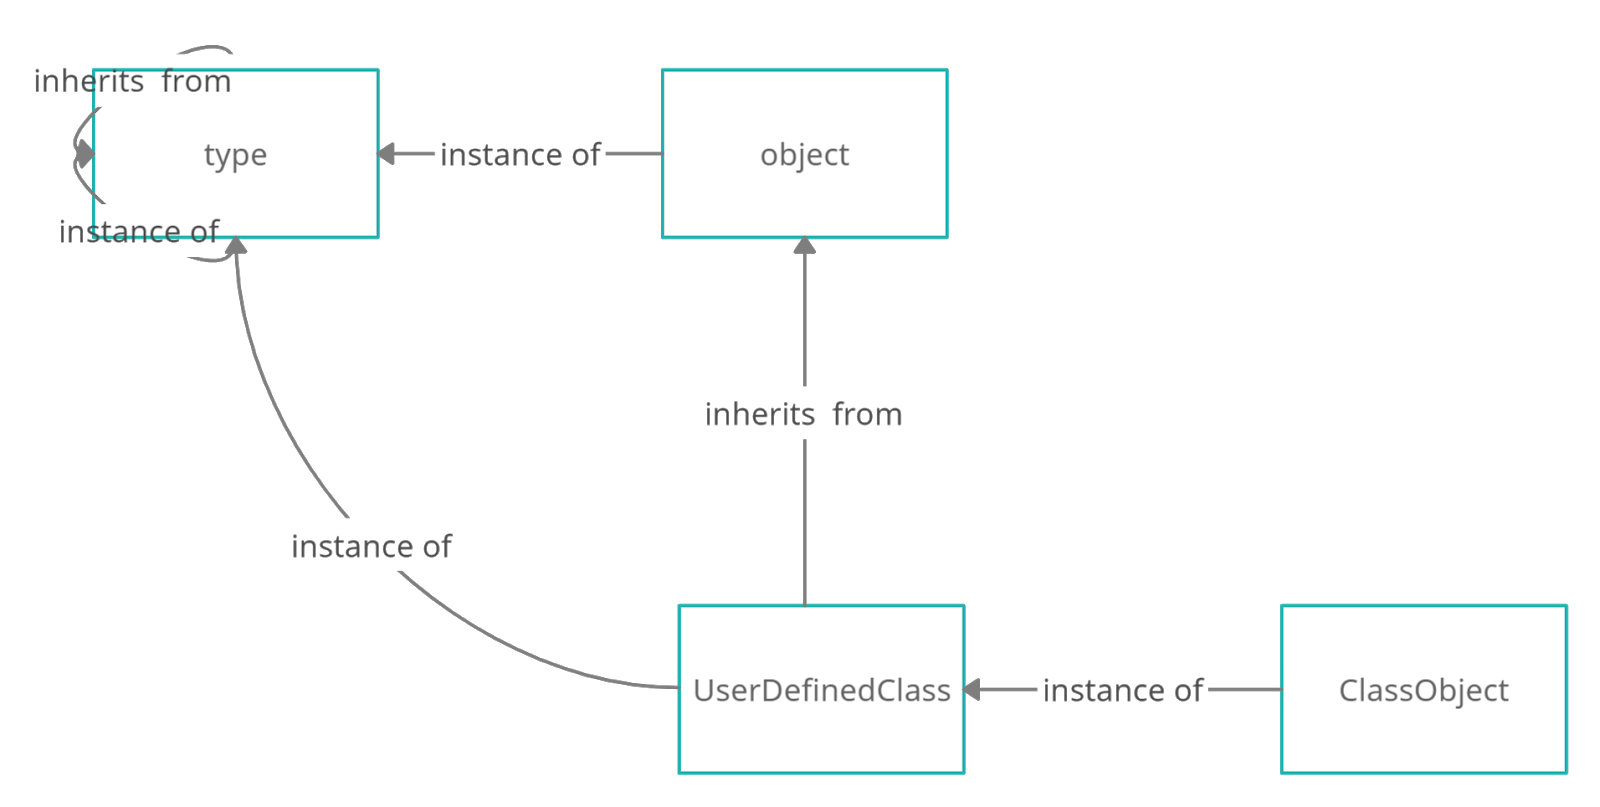

For instance, if you’ve ever created an abstract class in Python using the `ABC` module, you indirectly inherited the `ABCmeta` class. Or, if you’re a backend developer who uses Django, you’ve indirectly used the `ModelBase` metaclass through `model.Model`. 


Much like how you can dynamically create objects of a class using the syntax: `class_name()`, you create a class using the syntax: `type()`. Let’s illustrate this with an example:

In [ ]:
class Dummy():
    x = 12
    def meme():
        print("When you try to define constants \nPython: We don’t do that here.")

Dummy.meme()

The above syntax is equivalent to:

In [ ]:
def nameless_func():
    print("C++ – Can’t compare 'float' and 'int'. \nPython – Variable is variable.")
WierdDummy = type('WierdDummy',() ,{'x':12, 'meme': nameless_func})

WierdDummy.meme()

Here, `‘WierdDummy‘` is the new class’s name, `() `is a tuple containing the base class(es) that can be empty.  `{'x':12, 'meme': nameless_func}` is a dictionary that stores all class attribute names and values.

At first glance, this syntax seems obscure and useless, and it mostly is, but it can be extremely powerful for niche metaprogramming use cases. Imagine this scenario: You have four unrelated[ mixin classes](https://en.wikipedia.org/wiki/Mixin) with different functionalities, and you need to create all possible combinations of two. Now you could write all 6 new classes manually or dynamically create them with a few lines of code.

In [ ]:
class A:
    def show_a(self):
        print("Class A")

class B:
    def show_b(self):
        print("Class B")

class C:
    def show_c(self):
        print("Class C")

class D:
    def show_d(self):
        print("Class D")

from itertools import combinations
for base_classes in combinations([A, B, C, D], 2):
    new_class_name = "".join([c.__name__ for c in base_classes])
    globals()[new_class_name] = type(new_class_name , base_classes,{})

obj = AB()
obj.show_a()
obj.show_b()

# **Creating Metaclassses in Python**

To create your own custom metaclasses in Python, you need to inherit type, and to inherit from a custom metaclass; you need to explicitly specify it using metaclass=. Let’s create a metaclass for enforcing the PEP8 naming convention for functions and variables. 

In [ ]:
from warnings import warn

class EnforcePEP(type):
    def __new__(cls, clsname, bases, clsdct):
        new_dict = {}
        for attr, val in clsdct.items():
            if attr.lower() != attr:
                warn(f"Function/Variable naming convention not followed! '{attr}' will now be '{attr.lower()}'")
            new_dict[attr.lower()] = val
        return type(clsname, bases, new_dict)

In [ ]:
class Example(metaclass = EnforcePEP):
    X = 12
    nAme = "Dummy Class"

    def MAgic(self):
        print("Expelliarmus!")

obj = Example()

In [ ]:
obj.magic()

In [ ]:
 print(obj.X) #Gives Error

In [ ]:
#But
obj.x 

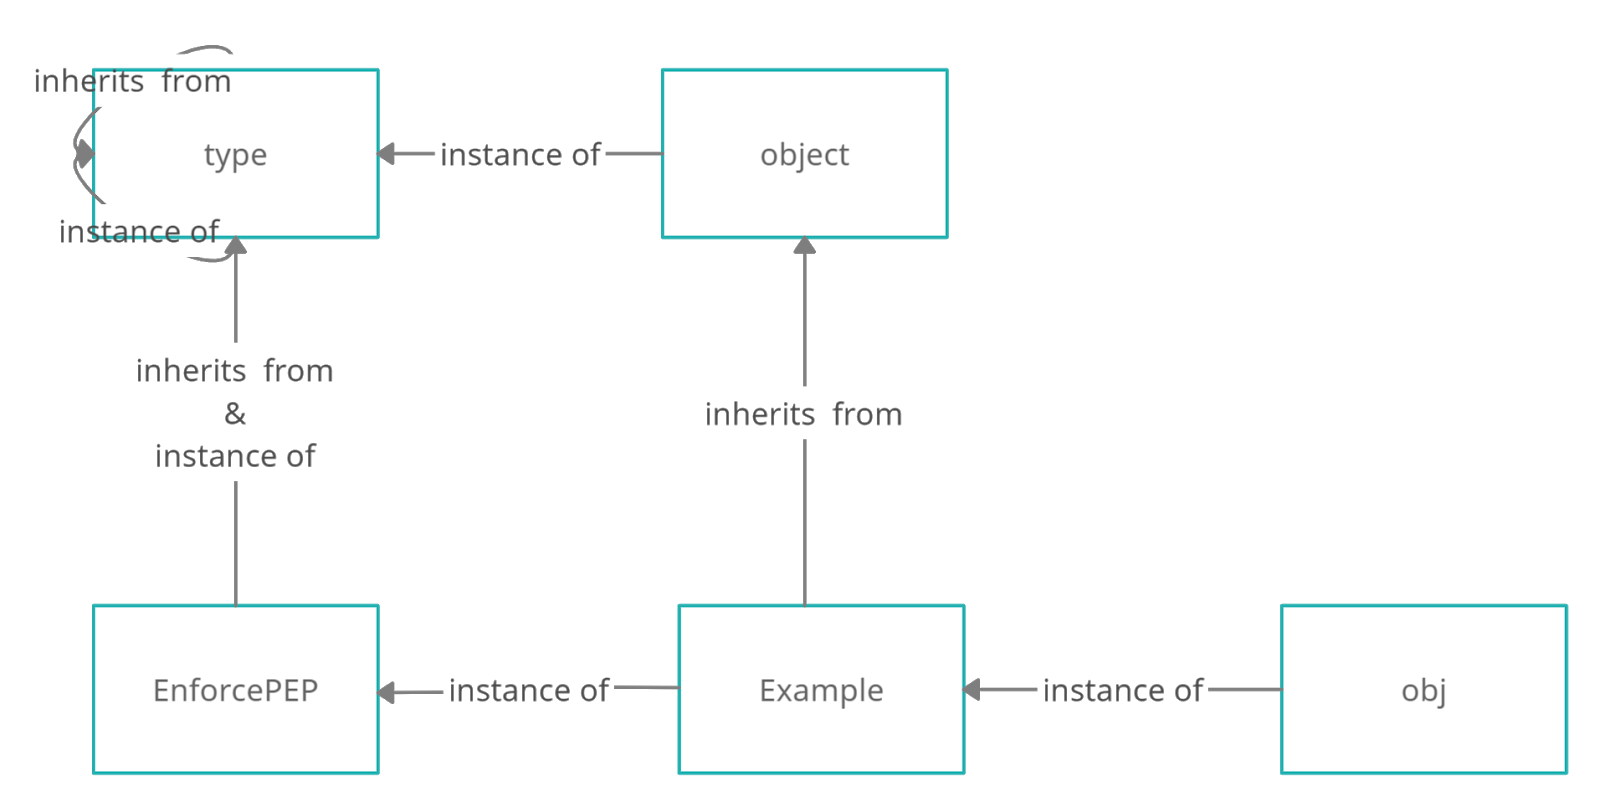

For more details, refer this [article](https://analyticsindiamag.com/complete-guide-to-python-metaclasses/) .